<a href="https://colab.research.google.com/github/1998456/1998456/blob/main/UBER_PROJECT(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Dependencies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
plt.style.use("ggplot")

# Data_Collection

In [29]:
uber_data= pd.read_csv("https://raw.githubusercontent.com/Karan-Malik/UberDataAnalysis/master/uber-raw-data-apr14.csv")
uber_data.head(10)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


In [30]:
uber_data.tail(10)

,Date/Time,Lat,Lon,Base
564506,4/30/2014 23:00:00,40.7316,-73.9891,B02764
564507,4/30/2014 23:04:00,40.7267,-73.9937,B02764
564508,4/30/2014 23:05:00,40.7788,-73.9600,B02764
564509,4/30/2014 23:15:00,40.7420,-74.0037,B02764
564510,4/30/2014 23:18:00,40.7514,-74.0066,B02764
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


# Data_Preprocessing

In [31]:
uber_data.shape

(564516, 4)

In [32]:
type(uber_data.iloc[0,0])

str

## Activating Date/Time column

In [33]:
uber_data["Date/Time"]= pd.to_datetime(uber_data["Date/Time"],format="%m/%d/%Y %H:%M:%S")

In [34]:
type(uber_data.iloc[0,0])

pandas._libs.tslibs.timestamps.Timestamp

 ## Confirming Activation

In [35]:
uber_data.head(10)

,Date/Time,Lat,Lon,Base
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512


### Extracting useful columns ;

In [36]:
uber_data["date"]=uber_data["Date/Time"].dt.day
uber_data["weekday"]= uber_data["Date/Time"].dt.day_name()
uber_data["hour"]= uber_data["Date/Time"].dt.hour
uber_data["min"]= uber_data["Date/Time"].dt.minute
uber_data["weekno"]= uber_data["Date/Time"].dt.weekofyear-13

<ipython-input-36-8fb359ce85e4>:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  uber_data["weekno"]= uber_data["Date/Time"].dt.weekofyear-13


In [37]:
uber_data.head(10)

,Date/Time,Lat,Lon,Base,date,weekday,hour,min,weekno
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,0,11,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,0,17,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,0,21,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,0,28,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,0,33,1
5,2014-04-01 00:33:00,40.7383,-74.0403,B02512,1,Tuesday,0,33,1
6,2014-04-01 00:39:00,40.7223,-73.9887,B02512,1,Tuesday,0,39,1
7,2014-04-01 00:45:00,40.7620,-73.9790,B02512,1,Tuesday,0,45,1
8,2014-04-01 00:55:00,40.7524,-73.9960,B02512,1,Tuesday,0,55,1
9,2014-04-01 01:01:00,40.7575,-73.9846,B02512,1,Tuesday,1,1,1


In [38]:
uber_data.tail(10)

,Date/Time,Lat,Lon,Base,date,weekday,hour,min,weekno
564506,2014-04-30 23:00:00,40.7316,-73.9891,B02764,30,Wednesday,23,0,5
564507,2014-04-30 23:04:00,40.7267,-73.9937,B02764,30,Wednesday,23,4,5
564508,2014-04-30 23:05:00,40.7788,-73.9600,B02764,30,Wednesday,23,5,5
564509,2014-04-30 23:15:00,40.7420,-74.0037,B02764,30,Wednesday,23,15,5
564510,2014-04-30 23:18:00,40.7514,-74.0066,B02764,30,Wednesday,23,18,5
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,Wednesday,23,22,5
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,Wednesday,23,26,5
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,Wednesday,23,31,5
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,Wednesday,23,32,5
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,Wednesday,23,48,5


### Checking Missing Values

In [39]:
uber_data.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
date         0
weekday      0
hour         0
min          0
weekno       0
dtype: int64

## Data_Analysis

Total number of uberpickups in April

In [40]:
# Accessing using weekdays;
week_day= pd.DataFrame(uber_data["weekday"].value_counts())
week_day

,weekday
Wednesday,108631
Tuesday,91185
Friday,90303
Thursday,85067
Saturday,77218
Monday,60861
Sunday,51251


Visualising

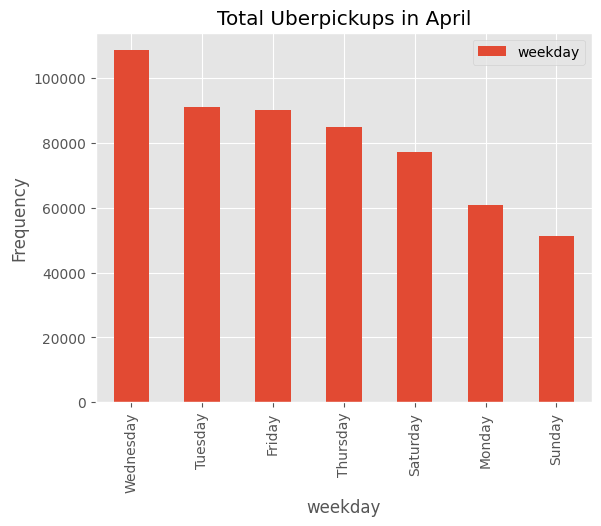

In [41]:
week_day.plot.bar()
plt.title("Total Uberpickups in April")
plt.xlabel("weekday")
plt.ylabel("Frequency")
plt.show()

Total Uberpickups per week

In [42]:
week_day= week_day/4

Visualising

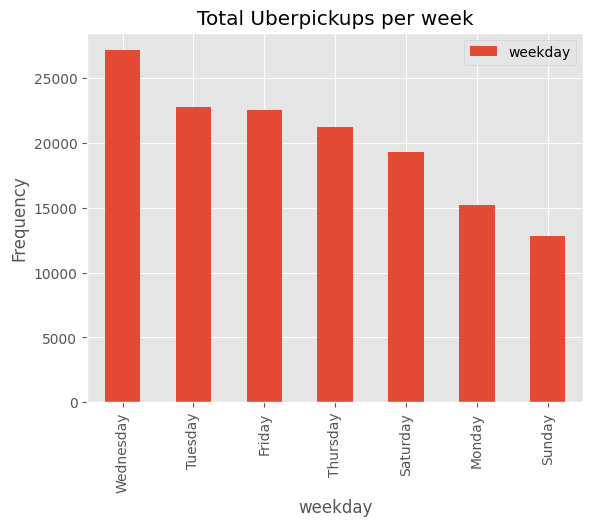

In [43]:
week_day.plot.bar()
plt.title("Total Uberpickups per week")
plt.xlabel("weekday")
plt.ylabel("Frequency")
plt.show()

Weekday vs Weekend

In [44]:
week_day["day_type"]=["wd","wd","wd","wd","we","wd","we"]

In [45]:
week_day

,weekday,day_type
Wednesday,27157.75,wd
Tuesday,22796.25,wd
Friday,22575.75,wd
Thursday,21266.75,wd
Saturday,19304.50,we
Monday,15215.25,wd
Sunday,12812.75,we


Visualising (Pie_chart)

In [46]:
pie= week_day.groupby("day_type").sum()
pie.iloc[0,0]= pie.iloc[0,0]/5
pie.iloc[1,0]= pie.iloc[1,0]/2
pie

,weekday
day_type,
wd,21802.350
we,16058.625


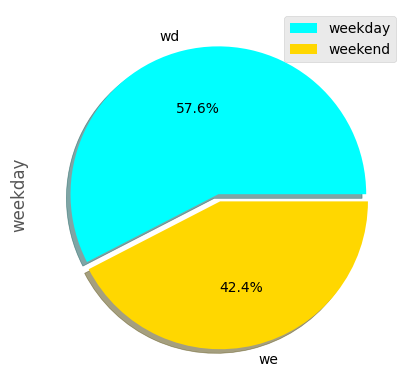

In [47]:
explode=[0,0.05]
colors=['cyan','gold']
labels=['weekday','weekend']
pie.plot.pie(autopct="%1.1f%%",shadow=True, subplots=True,colors=colors,explode=explode)
plt.legend(labels=labels)
plt.show()

Analysis by weeknumber

In [49]:
week_no= uber_data.groupby("weekno").count()

In [50]:
week_no= week_no["Lat"]
week_no= pd.DataFrame(week_no)

In [51]:
week_no.columns=["Frequency"]
week_no

,Frequency
weekno,
1,112401
2,123324
3,115698
4,138532
5,74561


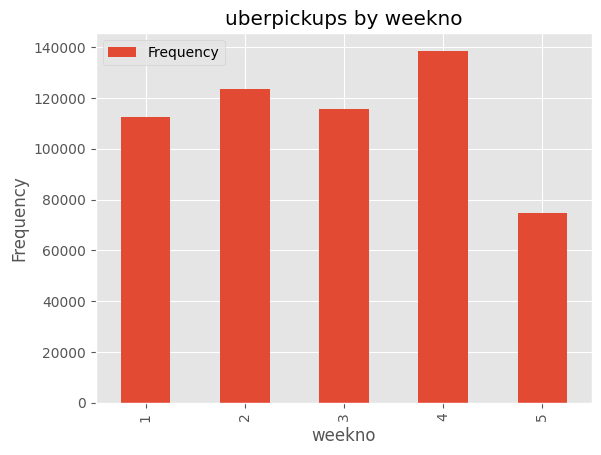

In [54]:
week_no.plot.bar()
plt.title("Uberpickups by weeknumber")
plt.xlabel("weekno")
plt.ylabel("Frequency")
plt.show()

Hour_Wise_Analysis

In [55]:
hour= uber_data.groupby("hour").count()

In [56]:
hour= pd.DataFrame(hour["Lat"])
hour.columns= ["Frequency"]
hour

,Frequency
hour,
0,11910
1,7769
2,4935
3,5040
4,6095
5,9476
6,18498
7,24924
8,22843


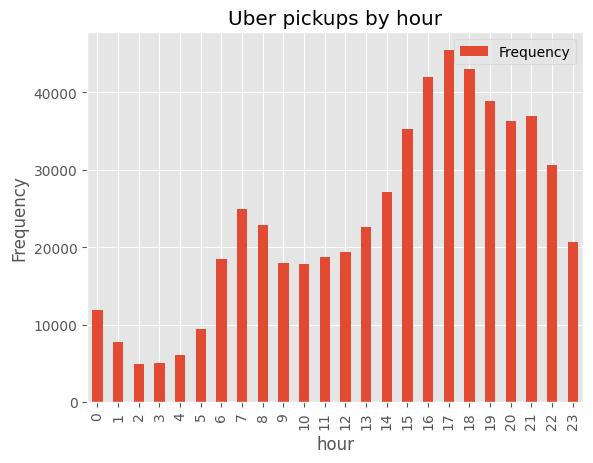

In [57]:
hour.plot.bar()
plt.ylabel("Frequency")
plt.title("Uber pickups by hour")
plt.show()

Analysis for Weekends

In [61]:
weekend= uber_data[(uber_data["weekday"]=='Sunday')|(uber_data["weekday"]=='Saturday')]

In [62]:
weekend= weekend.groupby("hour").count()
weekend=pd.DataFrame(weekend ["Lat"])
weekend.columns=["Frequency"]

In [63]:
weekend

,Frequency
hour,
0,7569
1,5415
2,3167
3,2065
4,1391
5,1297
6,1513
7,1983
8,2605


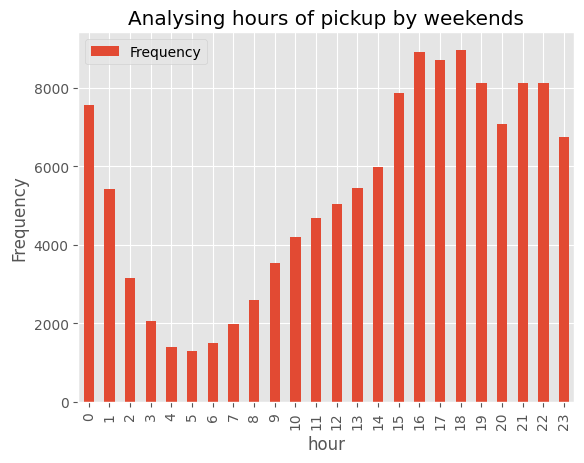

In [64]:
weekend.plot.bar()
plt.ylabel("Frequency")
plt.title("Analysing hours of pickup by weekends")
plt.show()

Analysis by Weekdays

In [67]:
weekday= uber_data[(uber_data["weekday"]!='Sunday')|(uber_data["weekday"]!='Saturday')]

In [68]:
weekday= weekday.groupby("hour").count()
weekday=pd.DataFrame(weekday["Lat"])
weekday.columns=["Frequency"]

In [69]:
weekday

,Frequency
hour,
0,11910
1,7769
2,4935
3,5040
4,6095
5,9476
6,18498
7,24924
8,22843


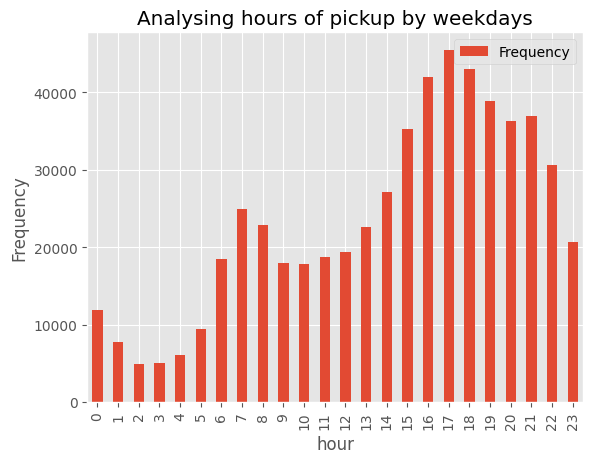

In [70]:
weekday.plot.bar()
plt.ylabel("Frequency")
plt.title("Analysing hours of pickup by weekdays")
plt.show()

Analysis by Minutes

In [71]:
minute= uber_data.groupby("min").count()

In [73]:
minute=pd.DataFrame(minute["Lat"])
minute.columns=["Frequency"]
minute

,Frequency
min,
0,9451
1,9358
2,9434
3,9243
4,9247
5,9486
6,9407
7,9409
8,9612


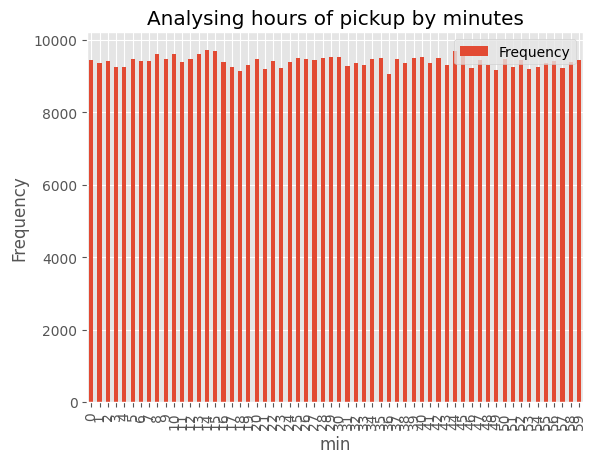

In [74]:
minute.plot.bar()
plt.ylabel("Frequency")
plt.title("Analysing hours of pickup by minutes")
plt.show()